In [ ]:
import pandas as pd
import os
import numpy as np
import io
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LassoCV, Lasso
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, RidgeCV
from statsmodels.tools import eval_measures
from sklearn import metrics
import datetime
import matplotlib.pyplot as plt

In [ ]:
weather_data = pd.read_csv("finalproject_dataset.csv")

# Data cleaning / exploration

In [ ]:
weather_data.shape

(3641, 23)

In [ ]:
weather_data.isna().any()

Unnamed: 0                            False
YEAR                                  False
MONTH                                 False
DAY                                   False
AWND(metres/sec)                      False
PRCP(cm)                              False
SNOW(cm)                              False
SNWD(cm)                              False
TMAX(celsius)                         False
TMIN(celsius)                         False
WDF2(degrees)                         False
WDF5(degrees)                         False
WSF2(metres/sec)                      False
WSF5(metres/sec)                      False
DailyDewPointTemperature(celsius)     False
DailyDryBulbTemperature(celsius)      False
DailyPrecipitation(cm)(Hourlymean)    False
DailyRelativeHumidity                 False
DailySeaLevelPressure(inches)         False
DailyStationPressure(inches)          False
DailyVisibility                       False
DailyWetBulbTemperature(celsius)      False
DailyWindSpeed(miles/hr)        

In [ ]:
weather_data = weather_data.iloc[0:,1:]

In [ ]:
weather_data.describe()

,YEAR,MONTH,DAY,AWND(metres/sec),PRCP(cm),SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),...,WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailySeaLevelPressure(inches),DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),DailyWindSpeed(miles/hr)
count,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,...,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000
mean,2015.814611,6.530349,15.707498,3.594068,0.331918,0.212318,0.800110,17.612346,9.945317,205.443285,...,11.177712,5.717272,13.450428,1.870857,62.633056,30.025481,29.944440,8.852511,9.791565,8.406904
std,2.900922,3.452141,8.796688,1.446744,0.907306,1.960416,3.968486,10.068464,9.280652,92.121270,...,3.298179,10.291792,9.388054,4.714029,15.622475,0.216883,0.219586,1.774155,8.692409,3.337377
min,2011.000000,1.000000,1.000000,0.650000,0.000000,0.000000,0.000000,-9.900000,-17.650000,10.000000,...,4.500000,-24.890873,-13.035714,0.000000,21.785714,29.112041,28.937949,0.759429,-14.656566,1.807692
25%,2013.000000,4.000000,8.000000,2.550000,0.000000,0.000000,0.000000,9.150000,2.750000,150.000000,...,8.900000,-2.290598,5.813492,0.000000,50.357143,29.883036,29.801714,8.303187,2.867063,6.035714
50%,2016.000000,7.000000,16.000000,3.300000,0.000000,0.000000,0.000000,18.300000,10.000000,215.000000,...,10.500000,6.333333,13.694444,0.000000,61.516667,30.018727,29.937818,9.853793,10.076628,7.719298
75%,2018.000000,10.000000,23.000000,4.350000,0.140000,0.000000,0.000000,26.400000,18.350000,290.000000,...,12.950000,14.652778,21.953704,0.990169,75.109589,30.165179,30.089531,9.991429,17.544643,10.122449
max,2021.000000,12.000000,31.000000,12.100000,15.760000,70.100000,62.500000,40.000000,29.150000,360.000000,...,30.400000,24.077381,32.638889,51.987337,96.923729,30.743036,30.663750,10.000000,26.250000,28.197917


In [ ]:
weather_data

,YEAR,MONTH,DAY,AWND(metres/sec),PRCP(cm),SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),...,WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyDryBulbTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailySeaLevelPressure(inches),DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),DailyWindSpeed(miles/hr)
0,2011,5,2,2.80,0.000,0.0,0.0,16.65,10.00,150.0,...,8.30,6.471193,12.453704,0.000000,68.027778,30.221574,30.138621,9.993333,9.779693,6.472222
1,2011,5,3,3.60,0.000,0.0,0.0,22.80,11.95,275.0,...,9.80,10.305305,14.671717,0.000000,76.054545,30.069619,29.962545,9.831892,13.343434,8.954955
2,2011,5,4,3.85,1.270,0.0,0.0,17.50,8.05,300.0,...,10.95,9.202509,11.645646,7.717692,85.686486,29.954112,29.865938,7.322043,10.028935,9.274194
3,2011,5,5,5.25,0.000,0.0,0.0,17.75,8.05,290.0,...,14.30,1.293019,12.227096,0.338667,52.884956,29.922075,29.860833,9.634386,7.024482,11.842105
4,2011,5,6,3.80,0.000,0.0,0.0,21.40,10.55,175.0,...,11.40,3.405350,15.102881,0.000000,48.027778,29.926916,29.839661,9.993333,9.416196,9.092593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,2021,4,15,3.25,2.225,0.0,0.0,14.70,7.20,325.0,...,11.40,8.237179,10.929487,9.786471,83.875000,29.721786,29.633269,6.639904,9.556624,6.851485
3637,2021,4,16,4.40,0.100,0.0,0.0,11.70,5.30,255.0,...,14.10,2.129630,7.793210,0.390769,68.736111,29.651250,29.571528,9.743333,5.246914,9.333333
3638,2021,4,17,3.15,0.000,0.0,0.0,13.05,6.40,275.0,...,8.75,1.345486,9.487847,0.000000,58.609375,29.765714,29.675937,9.992500,5.824653,7.063492
3639,2021,4,18,2.50,0.000,0.0,0.0,17.50,9.70,200.0,...,7.85,2.609127,13.095238,0.000000,50.196429,29.822679,29.744643,9.991429,8.154762,5.803571


# Lasso Regression

In [ ]:
train, val = train_test_split(weather_data, test_size = 0.3, random_state = 0)

In [ ]:
col = train.columns
col = col.drop("DailyDryBulbTemperature(celsius)")

In [ ]:
x_train = train[col]
y_train = train["DailyDryBulbTemperature(celsius)"]

x_val = val[col]
y_val = val["DailyDryBulbTemperature(celsius)"]

In [ ]:
x_train

,YEAR,MONTH,DAY,AWND(metres/sec),PRCP(cm),SNOW(cm),SNWD(cm),TMAX(celsius),TMIN(celsius),WDF2(degrees),...,WSF2(metres/sec),WSF5(metres/sec),DailyDewPointTemperature(celsius),DailyPrecipitation(cm)(Hourlymean),DailyRelativeHumidity,DailySeaLevelPressure(inches),DailyStationPressure(inches),DailyVisibility,DailyWetBulbTemperature(celsius),DailyWindSpeed(miles/hr)
847,2013,8,26,3.55,0.050,0.0,0.0,28.90,20.55,245.0,...,6.95,9.80,14.990079,0.211667,56.428571,30.062857,29.986071,9.830714,18.680556,8.307692
3315,2020,5,29,4.70,0.055,0.0,0.0,27.50,18.85,190.0,...,9.40,12.10,18.447122,0.259184,80.915663,29.963929,29.899024,8.575542,19.756098,10.122449
3550,2021,1,19,4.60,0.000,0.0,0.0,6.10,2.50,275.0,...,9.40,13.20,-5.694444,0.000000,50.392857,30.035179,29.955357,9.991429,0.436508,11.017857
1808,2016,4,13,2.70,0.000,0.0,0.0,14.15,5.00,30.0,...,7.40,10.30,-3.164683,0.000000,44.196429,30.343750,30.265536,9.991429,4.017857,6.452830
3473,2020,11,3,5.50,0.000,0.0,0.0,12.25,5.00,310.0,...,10.95,14.55,-2.636364,0.000000,44.836364,30.027818,29.949273,9.991429,4.171717,12.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2013,8,14,4.90,0.000,0.0,0.0,23.30,16.40,315.0,...,9.60,13.65,9.523810,0.000000,51.410714,29.883036,29.804464,9.991429,14.335317,11.357143
3264,2020,4,8,2.40,0.545,0.0,0.0,17.50,9.40,265.0,...,6.30,8.30,8.182442,3.175000,76.950617,29.569091,29.467778,7.524938,10.219479,5.691358
1653,2015,11,10,5.65,0.675,0.0,0.0,14.45,10.85,65.0,...,11.65,15.85,10.060976,3.165797,83.682927,30.019643,29.926098,6.870610,11.341463,12.634146
2607,2018,6,21,2.00,2.120,0.0,0.0,29.15,18.60,30.0,...,4.95,7.20,17.352246,19.692840,77.063830,29.773571,29.680319,6.406596,19.261229,4.988636


In [ ]:
for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_val[field] = (x_val[field] - mean) / standard_dev

<ipython-input-12-c40d1f657ae2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[field] = (x_train[field] - mean) / standard_dev
<ipython-input-12-c40d1f657ae2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val[field] = (x_val[field] - mean) / standard_dev


In [ ]:
lasso_model = LassoCV(random_state = 20, normalize = True, cv = 5).fit(x_train, y_train)

In [ ]:
pred = lasso_model.predict(x_train)
pred

array([24.44372007, 22.38317562,  4.32515517, ..., 12.50862437,
       22.81298614, 10.09527078])

In [ ]:
metrics.mean_squared_error(y_train, lasso_model.predict(x_train), squared = False)

0.3905368934048855

In [ ]:
metrics.mean_squared_error(y_val, lasso_model.predict(x_val), squared = False)

0.38771689924817926

In [ ]:
{col_name : coef for col_name, coef in zip(x_train.columns, lasso_model.coef_)}

{'YEAR': 0.0479467735086405,
 'MONTH': 0.01638983464623897,
 'DAY': -0.0,
 'AWND(metres/sec)': 0.0,
 'PRCP(cm)': 0.029453405811417182,
 'SNOW(cm)': 0.006688884760095964,
 'SNWD(cm)': -0.010485039439499577,
 'TMAX(celsius)': 1.5084681075131257,
 'TMIN(celsius)': 1.0302438632627398,
 'WDF2(degrees)': -0.011225828457723831,
 'WDF5(degrees)': -0.005918300056165166,
 'WSF2(metres/sec)': 0.0,
 'WSF5(metres/sec)': 0.0,
 'DailyDewPointTemperature(celsius)': 4.359984772095144,
 'DailyPrecipitation(cm)(Hourlymean)': -0.028225699180224106,
 'DailyRelativeHumidity': -2.4279055654827246,
 'DailySeaLevelPressure(inches)': -0.0,
 'DailyStationPressure(inches)': -0.05919651842293065,
 'DailyVisibility': -0.203232791233373,
 'DailyWetBulbTemperature(celsius)': 3.248986219860299,
 'DailyWindSpeed(miles/hr)': -0.0}

# Ridge Regression

In [ ]:
ridge_model = RidgeCV(cv = 5, normalize = True, alphas = [0.0001, 0.0005, 0.001, .01, .05, 0.1,]).fit(x_train, y_train)

In [ ]:
metrics.mean_squared_error(y_train, ridge_model.predict(x_train), squared = False)

0.3797104146120145

In [ ]:
metrics.mean_squared_error(y_val, ridge_model.predict(x_val), squared = False)

0.38277716630286884

# Feature Engineering (Lag data)

In [ ]:
df = weather_data[["YEAR", "MONTH", "DAY"]]

In [ ]:
DATE = pd.to_datetime(df)

In [ ]:
data=weather_data[['DailyDryBulbTemperature(celsius)']]

In [ ]:
data["DATE"] = DATE

<ipython-input-24-e62c6c4b747a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["DATE"] = DATE


In [ ]:
loop = list(range(7,366,7))

output=data

In [ ]:
output

,DailyDryBulbTemperature(celsius),DATE
0,12.453704,2011-05-02
1,14.671717,2011-05-03
2,11.645646,2011-05-04
3,12.227096,2011-05-05
4,15.102881,2011-05-06
...,...,...
3636,10.929487,2021-04-15
3637,7.793210,2021-04-16
3638,9.487847,2021-04-17
3639,13.095238,2021-04-18


In [ ]:
for lag in loop:
    lagged = data.shift(periods=lag)
    lagged.rename(columns={'DailyDryBulbTemperature(celsius)':'DailyDryBulbTemperature(celsius)'+str(lag)},
                  inplace=True)
    lagged.drop(columns='DATE',inplace=True)
    output = pd.merge(output,lagged, left_index=True, right_index=True)

In [ ]:
output["DailyDewPoint"] = weather_data["DailyDewPointTemperature(celsius)"]

In [ ]:
output.tail(7)

,DailyDryBulbTemperature(celsius),DATE,DailyDryBulbTemperature(celsius)7,DailyDryBulbTemperature(celsius)14,DailyDryBulbTemperature(celsius)21,DailyDryBulbTemperature(celsius)28,DailyDryBulbTemperature(celsius)35,DailyDryBulbTemperature(celsius)42,DailyDryBulbTemperature(celsius)49,DailyDryBulbTemperature(celsius)56,...,DailyDryBulbTemperature(celsius)308,DailyDryBulbTemperature(celsius)315,DailyDryBulbTemperature(celsius)322,DailyDryBulbTemperature(celsius)329,DailyDryBulbTemperature(celsius)336,DailyDryBulbTemperature(celsius)343,DailyDryBulbTemperature(celsius)350,DailyDryBulbTemperature(celsius)357,DailyDryBulbTemperature(celsius)364,DailyDewPoint
3634,11.427350,2021-04-13,14.315476,10.357143,9.549550,0.672043,10.863095,-1.777778,4.990584,4.548287,...,26.520468,20.248016,17.820513,15.428850,11.091270,12.490079,11.404040,9.952381,11.130952,4.017094
3635,15.478927,2021-04-14,14.007937,14.000000,9.129794,5.141243,8.270609,5.912698,8.274854,-1.507937,...,24.118774,21.172840,18.681392,13.482143,11.378968,9.272876,10.206349,6.636905,8.611111,6.704981
3636,10.929487,2021-04-15,14.285714,7.866667,13.190149,6.895762,12.229730,3.789683,7.291667,-2.587719,...,23.333333,24.623016,20.255556,13.323755,14.890873,14.196429,12.907228,7.051971,7.013889,8.237179
3637,7.793210,2021-04-16,10.757576,1.170635,15.630081,3.084291,16.302682,-0.386905,4.394841,-0.587607,...,25.409357,22.663818,22.054886,18.534622,22.777778,8.354978,14.377778,8.072562,6.411658,2.129630
3638,9.487847,2021-04-17,14.117199,6.170635,13.948413,7.460317,6.180556,0.128968,6.912281,-0.267094,...,19.722222,24.850949,22.828283,16.516096,20.450192,4.946237,17.628968,11.693548,6.718346,1.345486
3639,13.095238,2021-04-18,11.661376,12.132937,11.802935,10.198413,6.329365,1.190476,5.680751,-0.315904,...,17.923977,21.471735,17.410714,15.262346,15.197740,11.875000,20.238095,8.282248,11.527778,2.609127
3640,14.751984,2021-04-19,8.458050,14.097222,9.613095,9.216270,-0.198413,2.242063,5.777778,1.932099,...,19.463938,21.785714,16.775794,15.928270,15.446429,11.588694,16.488095,6.944444,11.250000,3.363095


In [ ]:
output.isnull().sum()

DailyDryBulbTemperature(celsius)         0
DATE                                     0
DailyDryBulbTemperature(celsius)7        7
DailyDryBulbTemperature(celsius)14      14
DailyDryBulbTemperature(celsius)21      21
DailyDryBulbTemperature(celsius)28      28
DailyDryBulbTemperature(celsius)35      35
DailyDryBulbTemperature(celsius)42      42
DailyDryBulbTemperature(celsius)49      49
DailyDryBulbTemperature(celsius)56      56
DailyDryBulbTemperature(celsius)63      63
DailyDryBulbTemperature(celsius)70      70
DailyDryBulbTemperature(celsius)77      77
DailyDryBulbTemperature(celsius)84      84
DailyDryBulbTemperature(celsius)91      91
DailyDryBulbTemperature(celsius)98      98
DailyDryBulbTemperature(celsius)105    105
DailyDryBulbTemperature(celsius)112    112
DailyDryBulbTemperature(celsius)119    119
DailyDryBulbTemperature(celsius)126    126
DailyDryBulbTemperature(celsius)133    133
DailyDryBulbTemperature(celsius)140    140
DailyDryBulbTemperature(celsius)147    147
DailyDryBul

In [ ]:
output = output.dropna()

# Lasso Regression (feature engineering)

In [ ]:
output.columns

Index(['DailyDryBulbTemperature(celsius)', 'DATE',
       'DailyDryBulbTemperature(celsius)7',
       'DailyDryBulbTemperature(celsius)14',
       'DailyDryBulbTemperature(celsius)21',
       'DailyDryBulbTemperature(celsius)28',
       'DailyDryBulbTemperature(celsius)35',
       'DailyDryBulbTemperature(celsius)42',
       'DailyDryBulbTemperature(celsius)49',
       'DailyDryBulbTemperature(celsius)56',
       'DailyDryBulbTemperature(celsius)63',
       'DailyDryBulbTemperature(celsius)70',
       'DailyDryBulbTemperature(celsius)77',
       'DailyDryBulbTemperature(celsius)84',
       'DailyDryBulbTemperature(celsius)91',
       'DailyDryBulbTemperature(celsius)98',
       'DailyDryBulbTemperature(celsius)105',
       'DailyDryBulbTemperature(celsius)112',
       'DailyDryBulbTemperature(celsius)119',
       'DailyDryBulbTemperature(celsius)126',
       'DailyDryBulbTemperature(celsius)133',
       'DailyDryBulbTemperature(celsius)140',
       'DailyDryBulbTemperature(celsius)147'

In [ ]:
output.shape

(3277, 55)

In [ ]:
train_output, val_output = train_test_split(output, test_size = 0.3, random_state = 0)

In [ ]:
col = train_output.columns
col = col.drop("DATE")
col = col.drop("DailyDryBulbTemperature(celsius)")

In [ ]:
x = train_output[col]
y = train_output["DailyDryBulbTemperature(celsius)"]

val_x = val_output[col]
val_y = val_output["DailyDryBulbTemperature(celsius)"]

In [ ]:
for field in x.columns:
    standard_dev = x[field].std()
    mean = x[field].mean()
    
    x[field] = (x[field] - mean) / standard_dev
    val_x[field] = (val_x[field] - mean) / standard_dev

<ipython-input-37-5411aae91cd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[field] = (x[field] - mean) / standard_dev
<ipython-input-37-5411aae91cd6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_x[field] = (val_x[field] - mean) / standard_dev


In [ ]:
lasso_model = LassoCV(random_state = 31, normalize = True, cv = 5).fit(x, y)

In [ ]:
lasso_model.alpha_

0.0007579397152850802

In [ ]:
metrics.mean_squared_error(y, lasso_model.predict(x), squared = False)

2.650615553921393

In [ ]:
metrics.mean_squared_error(val_y, lasso_model.predict(val_x), squared = False)

2.7314051810869735

In [ ]:
{col_name : coef for col_name, coef in zip(x.columns, lasso_model.coef_)}

{'DailyDryBulbTemperature(celsius)7': 0.40903664814017693,
 'DailyDryBulbTemperature(celsius)14': 0.6083318558239081,
 'DailyDryBulbTemperature(celsius)21': 0.3068652990028,
 'DailyDryBulbTemperature(celsius)28': 0.0,
 'DailyDryBulbTemperature(celsius)35': 0.16508327683247717,
 'DailyDryBulbTemperature(celsius)42': 0.09586822251598623,
 'DailyDryBulbTemperature(celsius)49': 0.0,
 'DailyDryBulbTemperature(celsius)56': 0.20099446973653423,
 'DailyDryBulbTemperature(celsius)63': 0.0,
 'DailyDryBulbTemperature(celsius)70': 0.1805296313055496,
 'DailyDryBulbTemperature(celsius)77': 0.0,
 'DailyDryBulbTemperature(celsius)84': -0.0,
 'DailyDryBulbTemperature(celsius)91': 0.0,
 'DailyDryBulbTemperature(celsius)98': -0.08748517391034981,
 'DailyDryBulbTemperature(celsius)105': -0.0,
 'DailyDryBulbTemperature(celsius)112': -0.0,
 'DailyDryBulbTemperature(celsius)119': -0.0,
 'DailyDryBulbTemperature(celsius)126': -0.0,
 'DailyDryBulbTemperature(celsius)133': -0.0,
 'DailyDryBulbTemperature(celsi

# Ridge Regression

In [ ]:
ridge_model = RidgeCV(cv = 5, normalize = True, alphas = [0.0001, 0.001, .01, .05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1]).fit(x, y)

In [ ]:
metrics.mean_squared_error(y, ridge_model.predict(x), squared = False)

2.641394925960268

In [ ]:
metrics.mean_squared_error(val_y, ridge_model.predict(val_x), squared = False)

2.7439319871906975

# Feature engineering: Rolling Average

In [ ]:
rollavg =data[['DATE','DailyDryBulbTemperature(celsius)']]

In [ ]:
weather_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'AWND(metres/sec)', 'PRCP(cm)', 'SNOW(cm)',
       'SNWD(cm)', 'TMAX(celsius)', 'TMIN(celsius)', 'WDF2(degrees)',
       'WDF5(degrees)', 'WSF2(metres/sec)', 'WSF5(metres/sec)',
       'DailyDewPointTemperature(celsius)', 'DailyDryBulbTemperature(celsius)',
       'DailyPrecipitation(cm)(Hourlymean)', 'DailyRelativeHumidity',
       'DailySeaLevelPressure(inches)', 'DailyStationPressure(inches)',
       'DailyVisibility', 'DailyWetBulbTemperature(celsius)',
       'DailyWindSpeed(miles/hr)'],
      dtype='object')

In [ ]:
rollavg

,DATE,DailyDryBulbTemperature(celsius)
0,2011-05-02,12.453704
1,2011-05-03,14.671717
2,2011-05-04,11.645646
3,2011-05-05,12.227096
4,2011-05-06,15.102881
...,...,...
3636,2021-04-15,10.929487
3637,2021-04-16,7.793210
3638,2021-04-17,9.487847
3639,2021-04-18,13.095238


In [ ]:
rollavg['RollingAvTemp']=rollavg["DailyDryBulbTemperature(celsius)"].rolling(7).mean()

<ipython-input-49-a234f32b7e7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollavg['RollingAvTemp']=rollavg["DailyDryBulbTemperature(celsius)"].rolling(7).mean()


In [ ]:
rollavg['Month']=rollavg.DATE.dt.month
rollavg['Day']=rollavg.DATE.dt.day

<ipython-input-50-60b0b2cb0be7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollavg['Month']=rollavg.DATE.dt.month
<ipython-input-50-60b0b2cb0be7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollavg['Day']=rollavg.DATE.dt.day


In [ ]:
annualaverages = rollavg[['RollingAvTemp']].groupby([rollavg.Day,rollavg.Month]).mean().reset_index()

In [ ]:
rollavg["DailyDewPoint"] = weather_data['DailyDewPointTemperature(celsius)']
rollavg["DailyRelativeHumidity"] = weather_data["DailyRelativeHumidity"]
rollavg['DailyWetBulbTemperature(celsius)'] = weather_data['DailyWetBulbTemperature(celsius)']

<ipython-input-52-359e4325e6f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollavg["DailyDewPoint"] = weather_data['DailyDewPointTemperature(celsius)']
<ipython-input-52-359e4325e6f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollavg["DailyRelativeHumidity"] = weather_data["DailyRelativeHumidity"]
<ipython-input-52-359e4325e6f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
rolling_avg = pd.merge(rollavg,annualaverages,how='outer',on=['Month','Day'])

In [ ]:
rolling_avg.isna().any()

DATE                                False
DailyDryBulbTemperature(celsius)    False
RollingAvTemp_x                      True
Month                               False
Day                                 False
DailyDewPoint                       False
DailyRelativeHumidity               False
DailyWetBulbTemperature(celsius)    False
RollingAvTemp_y                     False
dtype: bool

In [ ]:
rolling_avg = rolling_avg.dropna()

# Lasso Regression (Rolling avg)

In [ ]:
rolling_avg

,DATE,DailyDryBulbTemperature(celsius),RollingAvTemp_x,Month,Day,DailyDewPoint,DailyRelativeHumidity,DailyWetBulbTemperature(celsius),RollingAvTemp_y
1,2012-05-02,11.038360,11.106755,5,2,8.273810,84.369048,9.494949,12.993826
2,2013-05-02,15.165692,14.141791,5,2,4.873294,52.912281,10.087719,12.993826
3,2014-05-02,16.676587,11.900066,5,2,2.996032,42.982143,10.089286,12.993826
4,2015-05-02,12.777778,13.242441,5,2,4.397363,58.152542,8.700565,12.993826
5,2016-05-02,11.207729,10.925316,5,2,8.297101,82.836957,9.734300,12.993826
...,...,...,...,...,...,...,...,...,...
3636,2016-05-01,8.996212,11.411797,5,1,5.517677,79.556818,7.468434,12.420871
3637,2017-05-01,14.292929,16.226990,5,1,11.017316,81.701299,12.366522,12.420871
3638,2018-05-01,18.769841,13.276687,5,1,-0.386905,31.660714,9.801587,12.420871
3639,2019-05-01,10.827160,11.087951,5,1,7.407407,80.711111,9.185185,12.420871


In [ ]:
train_rollavg, val_rollavg = train_test_split(rolling_avg, test_size = 0.3, random_state = 0)

In [ ]:
col = rolling_avg.columns
col = col.drop("DATE")
col = col.drop("DailyDryBulbTemperature(celsius)")

In [ ]:
x = train_rollavg[col]
y = train_rollavg["DailyDryBulbTemperature(celsius)"]

val_x = val_rollavg[col]
val_y = val_rollavg["DailyDryBulbTemperature(celsius)"]

In [ ]:
for field in x.columns:
    standard_dev = x[field].std()
    mean = x[field].mean()
    
    x[field] = (x[field] - mean) / standard_dev
    val_x[field] = (val_x[field] - mean) / standard_dev

<ipython-input-60-5411aae91cd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[field] = (x[field] - mean) / standard_dev
<ipython-input-60-5411aae91cd6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_x[field] = (val_x[field] - mean) / standard_dev


In [ ]:
lasso_model = LassoCV(random_state = 41, normalize = True, cv = 5).fit(x, y)

In [ ]:
metrics.mean_squared_error(y, lasso_model.predict(x), squared = False)

0.4838167541081033

In [ ]:
metrics.mean_squared_error(val_y, lasso_model.predict(val_x), squared = False)

0.5050951148758579

In [ ]:
{col_name : coef for col_name, coef in zip(x.columns, lasso_model.coef_)}

{'RollingAvTemp_x': -0.0,
 'Month': -0.05285003251182798,
 'Day': -0.003521858042777155,
 'DailyDewPoint': 4.259923639740489,
 'DailyRelativeHumidity': -2.67277540936446,
 'DailyWetBulbTemperature(celsius)': 5.995499533959639,
 'RollingAvTemp_y': -0.04124268839028808}

## Ridge regression (rolling average)

In [ ]:
ridge_model = RidgeCV(cv = 5, normalize = True, alphas = [0.0001, 0.001, .01, .05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1]).fit(x, y)

In [ ]:
metrics.mean_squared_error(y, ridge_model.predict(x), squared = False)

0.47922334550708967

In [ ]:
metrics.mean_squared_error(val_y, ridge_model.predict(val_x), squared = False)

0.5049723000376992

# Feature Engineering

In [ ]:
col = weather_data.columns

In [ ]:
df = weather_data[col]

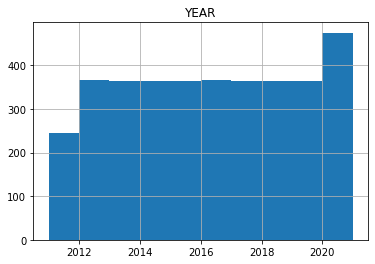

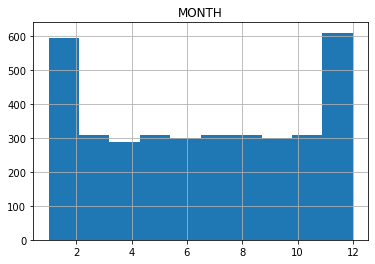

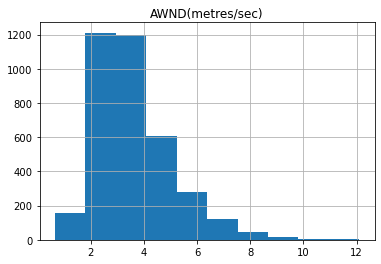

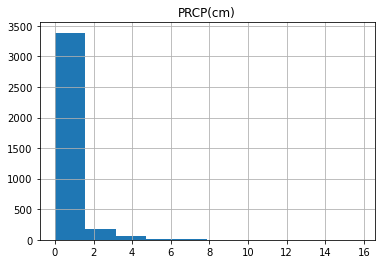

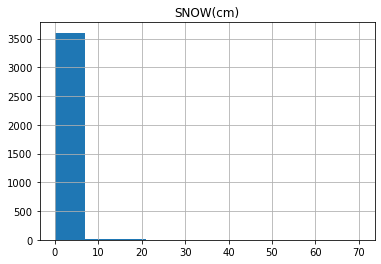

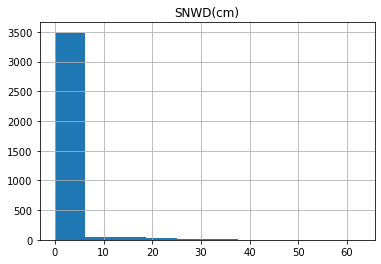

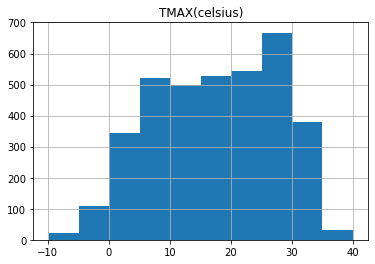

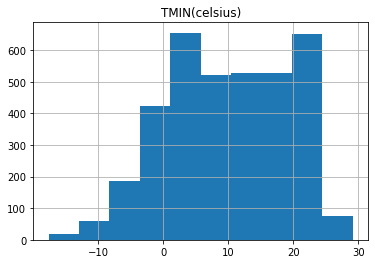

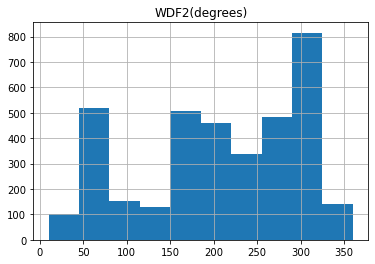

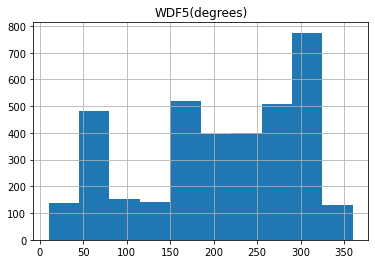

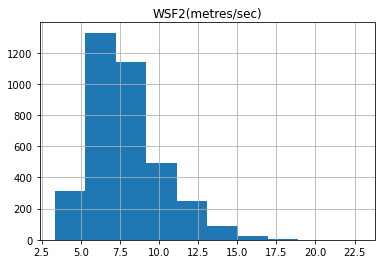

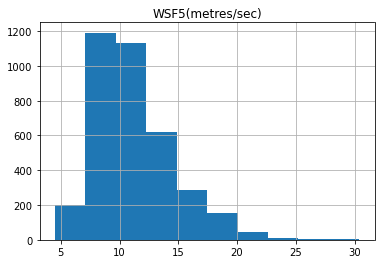

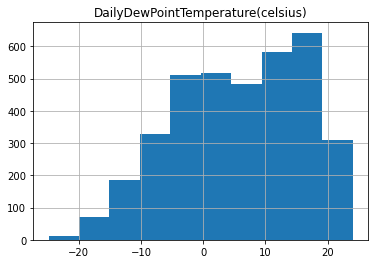

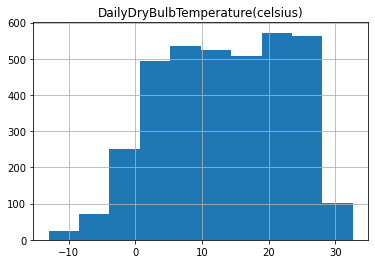

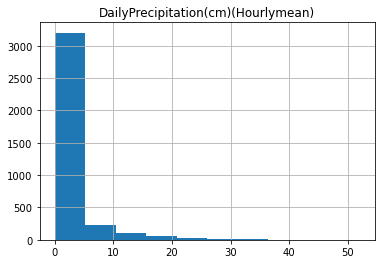

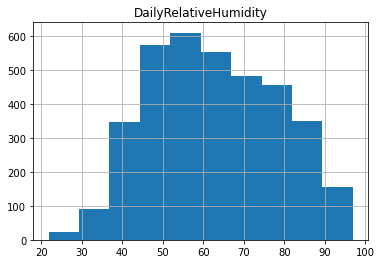

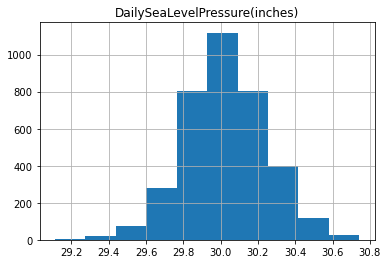

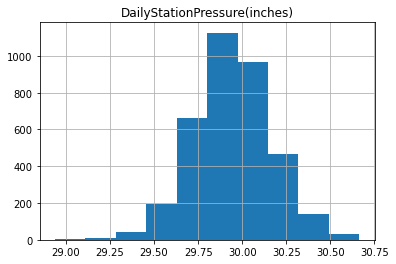

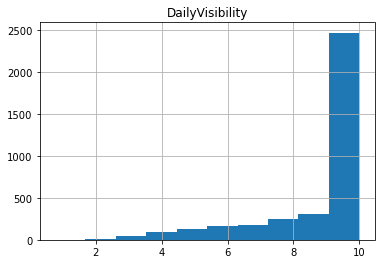

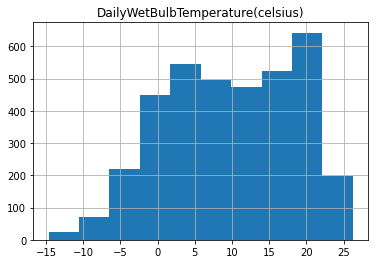

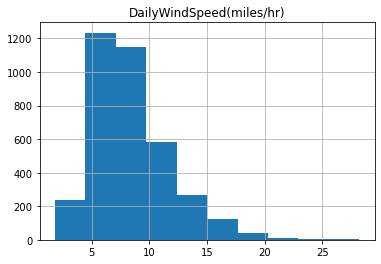

In [ ]:
column = col.drop("YEAR")
column = col.drop("MONTH")
column = col.drop("DAY")

for i in column:
    df[i].hist()
    plt.title(i)
    plt.show()

In [ ]:
col

Index(['YEAR', 'MONTH', 'DAY', 'AWND(metres/sec)', 'PRCP(cm)', 'SNOW(cm)',
       'SNWD(cm)', 'TMAX(celsius)', 'TMIN(celsius)', 'WDF2(degrees)',
       'WDF5(degrees)', 'WSF2(metres/sec)', 'WSF5(metres/sec)',
       'DailyDewPointTemperature(celsius)', 'DailyDryBulbTemperature(celsius)',
       'DailyPrecipitation(cm)(Hourlymean)', 'DailyRelativeHumidity',
       'DailySeaLevelPressure(inches)', 'DailyStationPressure(inches)',
       'DailyVisibility', 'DailyWetBulbTemperature(celsius)',
       'DailyWindSpeed(miles/hr)'],
      dtype='object')

<AxesSubplot:>

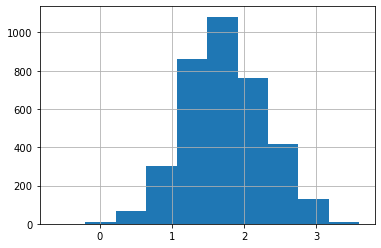

In [ ]:
df["AWND(metres/sec)"].map(math.log2).hist()

In [ ]:
col = col.drop("DailyDryBulbTemperature(celsius)")

x_train = train[col]
y_train = train["DailyDryBulbTemperature(celsius)"]
x_val = val[col]
y_val = val["DailyDryBulbTemperature(celsius)"]

In [ ]:
#feature engineering
#x_train["TMAX_sqrt"] = (x_train["TMAX(celsius)"]-x_train["TMAX(celsius)"].min()+1).transform(np.sqrt)
#x_val["TMAX_sqrt"] = (x_val["TMAX(celsius)"]-x_val["TMAX(celsius)"].min()+1).transform(np.sqrt)

#x_train["TMINsqrt"] = (x_train["TMIN(celsius)"]-x_train["TMIN(celsius)"].min()+1).transform(np.sqrt)
#x_val["TMINsqrt"] = (x_val["TMIN(celsius)"]-x_val["TMIN(celsius)"].min()+1).transform(np.sqrt)

#x_train["difference"] = (x_train["TMAX(celsius)"]-x_train["TMIN(celsius)"])
#x_val["difference"] = (x_val["TMAX(celsius)"]-x_val["TMIN(celsius)"])

x_train["AWND_log"] = x_train["AWND(metres/sec)"].transform(np.log2)
x_train.drop(columns = ["AWND(metres/sec)"], inplace = True)
x_val["AWND_log"] = x_val["AWND(metres/sec)"].transform(np.log2)
x_val.drop(columns = ["AWND(metres/sec)"], inplace = True)

x_train["rain_mean"] = x_train["DailyPrecipitation(cm)(Hourlymean)"].map(lambda val: 1 if val > 0 else 0)
x_train.drop(columns = ["DailyPrecipitation(cm)(Hourlymean)"], inplace = True)
x_val["rain_mean"] = x_val["DailyPrecipitation(cm)(Hourlymean)"].map(lambda val: 1 if val > 0 else 0)
x_val.drop(columns = ["DailyPrecipitation(cm)(Hourlymean)"], inplace = True)

#x_train["WSF5_log"] = x_train["WSF5(metres/sec)"].transform(np.log2)
#x_train.drop(columns = ["WSF5(metres/sec)"], inplace = True)
#x_val["WSF5_log"] = x_val["WSF5(metres/sec)"].transform(np.log2)
#x_val.drop(columns = ["WSF5(metres/sec)"], inplace = True)

#x_train["windspeed_log"] = x_train["DailyWindSpeed(miles/hr)"].transform(np.log2)
#x_train.drop(columns = ["DailyWindSpeed(miles/hr)"], inplace = True)
#x_val["windspeed_log"] = x_val["DailyWindSpeed(miles/hr)"].transform(np.log2)
#x_val.drop(columns = ["DailyWindSpeed(miles/hr)"], inplace = True)

#x_train["WSF2_log"] = x_train["WSF2(metres/sec)"].transform(np.log2)
#x_train.drop(columns = ["WSF2(metres/sec)"], inplace = True)
#x_val["WSF2_log"] = x_val["WSF2(metres/sec)"].transform(np.log2)
#x_val.drop(columns = ["WSF2(metres/sec)"], inplace = True)

x_train["Humdity/temp"] = (x_train["DailyRelativeHumidity"]-
                            x_train["DailyDewPointTemperature(celsius)"])
x_val["Humdity/temp"] = (x_val["DailyRelativeHumidity"]-
                            x_val["DailyDewPointTemperature(celsius)"])

x_train["Dewpoint_sqrt"] = (x_train["DailyDewPointTemperature(celsius)"]-
                            x_train["DailyDewPointTemperature(celsius)"].min()+1).transform(np.sqrt)
x_val["Dewpoint_sqrt"] = (x_val["DailyDewPointTemperature(celsius)"]-
                            x_val["DailyDewPointTemperature(celsius)"].min()+1).transform(np.sqrt)

#x_train["Wetbulb_sqrt"] = (x_train["DailyDewPointTemperature(celsius)"]-
                            #x_train["DailyDewPointTemperature(celsius)"].min()+1).transform(np.sqrt)
#x_val["Wetbulb_sqrt"] = (x_val["DailyWetBulbTemperature(celsius)"]-
                            #x_val["DailyWetBulbTemperature(celsius)"].min()+1).transform(np.sqrt)

#x_train["temp/wind"] = (x_train["TMAX(celsius)"]/x_train["DailyWindSpeed(miles/hr)"])
#x_val["temp/wind"] = (x_val["TMAX(celsius)"]/x_val["DailyWindSpeed(miles/hr)"])

x_train["wetbulb/visibility"] = (x_train["DailyWetBulbTemperature(celsius)"]/x_train["DailyVisibility"])
x_val["wetbulb/visibility"] = (x_val["DailyWetBulbTemperature(celsius)"]/x_val["DailyVisibility"])

In [ ]:
for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_val[field] = (x_val[field] - mean) / standard_dev

In [ ]:
lasso_model = LassoCV(random_state = 123, normalize = True, cv = 5).fit(x_train, y_train)

In [ ]:
metrics.mean_squared_error(y_train, lasso_model.predict(x_train), squared = False)

0.34282482373250917

In [ ]:
metrics.mean_squared_error(y_val, lasso_model.predict(x_val), squared = False)

0.3502610839384115

In [ ]:
{col_name : coef for col_name, coef in zip(x_train.columns, lasso_model.coef_)}

{'YEAR': 0.03408393767289274,
 'MONTH': -0.0,
 'DAY': 0.0,
 'PRCP(cm)': 0.006842082320079603,
 'SNOW(cm)': 0.0,
 'SNWD(cm)': 0.0,
 'TMAX(celsius)': 1.027485395620364,
 'TMIN(celsius)': 0.675019744933569,
 'WDF2(degrees)': -0.0,
 'WDF5(degrees)': -0.002114203191019785,
 'WSF2(metres/sec)': 0.0,
 'WSF5(metres/sec)': 0.0,
 'DailyDewPointTemperature(celsius)': 1.4105039738468168,
 'DailyRelativeHumidity': -0.0,
 'DailySeaLevelPressure(inches)': -0.024089306646680596,
 'DailyStationPressure(inches)': -0.0,
 'DailyVisibility': -0.2797345734597328,
 'DailyWetBulbTemperature(celsius)': 4.0288032588380975,
 'DailyWindSpeed(miles/hr)': 0.0,
 'AWND_log': 0.0034788094090425973,
 'rain_mean': 0.030754208837538807,
 'Humdity/temp': -2.341614718479412,
 'Dewpoint_sqrt': 1.4027409324695683,
 'wetbulb/visibility': -0.07786813741701742}